In [19]:
import sys

sys.path.insert(0, '../')
sys.path.insert(0, '../utils/')
import utils.io_manager as iom
import utils.models as mdl
import utils.data as dat
import utils.variables as vrb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [20]:
df = iom.read_data()

columns = dat.get_colums_target_features_1()
_, _, df_test = dat.get_train_valid_test_sets(df, columns)

model = iom.read_model("model_5_GRU32_univar1_out1")

In [23]:
start_time = '2023-09-04 00:00:00'
finish_time = '2025-03-20 23:00:00'

idx_start_time = df_test.index.get_loc(start_time)
idx_finish_time = df_test.index.get_loc(finish_time)

predictions_count = idx_finish_time - idx_start_time
column_predict ="Predict"

seq_length = vrb.DEFAULT_SEQUENCE_LENGTH

df_results = df_test[idx_start_time: idx_start_time + predictions_count].copy()
df_results[column_predict] = 0.0

for i in range(0,predictions_count):
    idx_from = idx_start_time - seq_length + i
    idx_to = idx_start_time - 1 + i
    print(f"Predict {i+1}/{predictions_count} => df_test[{idx_from}:{idx_to}]")
    X = df_test.to_numpy()[np.newaxis, idx_from: idx_to, np.newaxis]
    df_results.iloc[i, df_results.columns.get_loc(column_predict)] = model.predict(X)

df_results[column_predict] = round(df_results[column_predict], 6)


Predict 1/9612 => df_test[24:71]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
Predict 2/9612 => df_test[25:72]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predict 3/9612 => df_test[26:73]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predict 4/9612 => df_test[27:74]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predict 5/9612 => df_test[28:75]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predict 6/9612 => df_test[29:76]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predict 7/9612 => df_test[30:77]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predict 8/9612 => df_test[31:78]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predict 9/9612 => df_test[32:79]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predict 10/9612 => df_test[33:80]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predict 11/9612 => df_test[34:81]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predict 12/9612 => df_test[35:82]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predict 13/9612 => df_test[36:83]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predict 14/9612 => df_test[37:84]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/s

In [24]:
df_results

,Close,Predict
DateTime,,
2023-09-04 00:00:00,1.07786,1.077278
2023-09-04 01:00:00,1.07764,1.077345
2023-09-04 02:00:00,1.07856,1.077532
2023-09-04 03:00:00,1.07857,1.077524
2023-09-04 04:00:00,1.07867,1.077967
...,...,...
2025-03-20 18:00:00,1.08482,1.084305
2025-03-20 19:00:00,1.08529,1.084340
2025-03-20 20:00:00,1.08530,1.084543


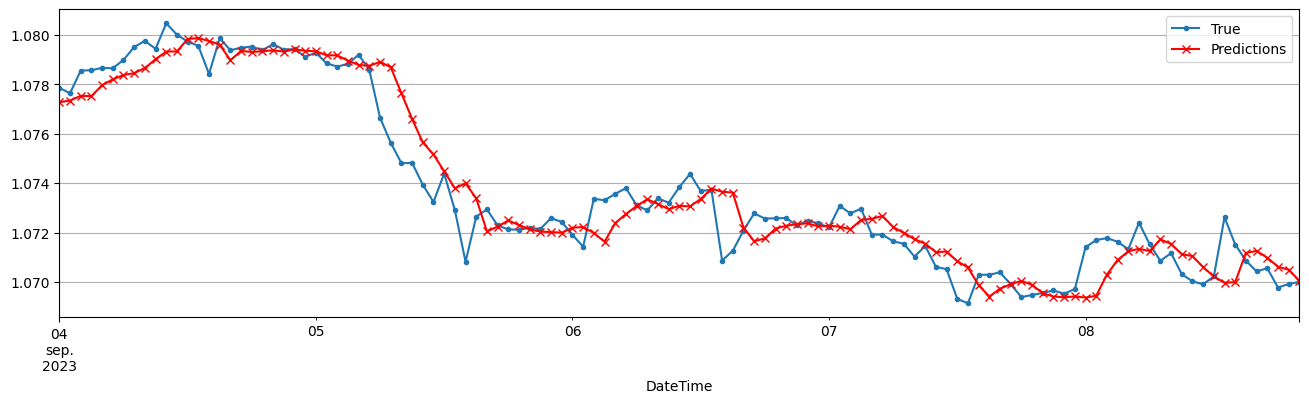

In [25]:
plot_start = '2023-09-04'
plot_finish = '2023-09-08'
fig, ax = plt.subplots(figsize=(16, 4))
df_results[plot_start:plot_finish][vrb.COLUMN_CLOSE].plot(label="True", marker=".", ax=ax)
df_results[plot_start:plot_finish][column_predict].plot(label="Predictions", grid=True, marker="x", color="r", ax=ax)
plt.legend()
plt.show();

In [26]:
print("RMSE:", np.sqrt(mean_squared_error(df_results[vrb.COLUMN_CLOSE], df_results[column_predict])))
print("MAPE:", mean_absolute_percentage_error(df_results[vrb.COLUMN_CLOSE], df_results[column_predict]) * 100)

RMSE: 0.0014282028669089794
MAPE: 0.08854152722508923
